# Analýza hlavních komponent

## Úkol

- V datasetu Portland Housing Prices/Sales Jul 2020 - Jul 2021 zjistěte, jestli je zde problém multikolinearity.
- Proveďte analyzu hlavních komponent
- Vytvořte lineární model z PCA a model porovnejte s minulým cvičením

# Načtení dat

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv ("..\dataset\portland_filtered.csv",  sep=';')

# Analýza
- zobrazte data
- vyřešte NaN hodnoty
- zobrazte základní statistiky dat
- zobrazte korelační matici

# Příprava dat
- vyberte X promenné bathrooms', 'bedrooms', 'livingArea','age','price'
- proměnné standardizujte

# Zobrazte VIF pro každou proměnnou

# PCA
- Proveďte PCA
- zobrazte korelační matici

# Lineární model
- Vytvořte a natrénujte Lineární model pro PCA proměnné
- Zobrazte R2 a RMSE

   bathrooms  bedrooms  livingArea  age    price
0          3         5        3470    7  1165000
1          4         5        3374   85  1050000
2          3         3        3265   20   442500
3          3         3        3192   36   765000
4          3         4        3157   73   815000
Počet NaN hodnot v každém sloupci:
bathrooms     0
bedrooms      0
livingArea    0
age           0
price         0
dtype: int64
Základní statistiky:
        bathrooms    bedrooms   livingArea        age         price
count  100.000000  100.000000   100.000000  100.00000  1.000000e+02
mean     2.380000    3.260000  1974.080000   49.88000  5.196074e+05
std      0.838228    0.860115   663.629851   32.77973  1.722241e+05
min      1.000000    1.000000   766.000000    3.00000  1.650000e+05
25%      2.000000    3.000000  1530.000000   20.00000  4.125000e+05
50%      2.000000    3.000000  1859.000000   47.50000  5.000000e+05
75%      3.000000    4.000000  2490.250000   75.25000  5.995312e+05
max      5.00

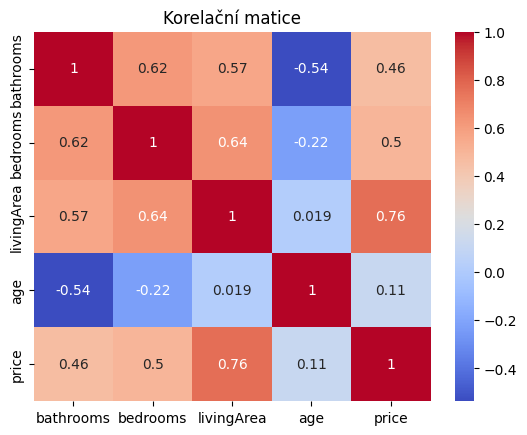

VIF pro každou proměnnou:
      feature       VIF
0   bathrooms  2.989507
1    bedrooms  2.037278
2  livingArea  3.280001
3         age  1.930008
4       price  2.550418
Vysvětlený rozptyl každou komponentou:
[0.56642342 0.26245728 0.08512934 0.04495186 0.0410381 ]


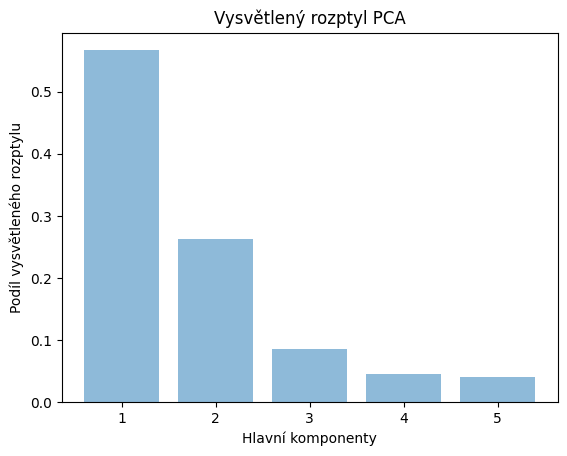

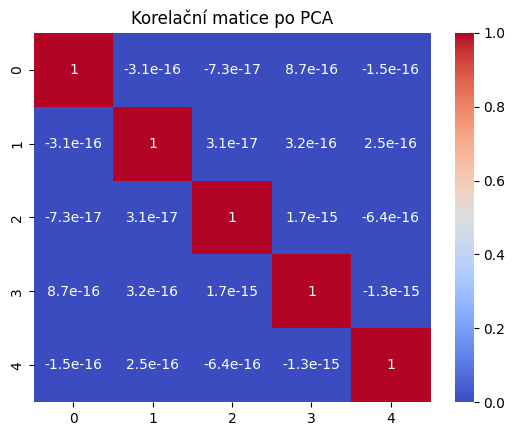

Lineární model s PCA:
R² (train): 1.0, RMSE (train): 2.8702707543421997e-10
R² (test): 1.0, RMSE (test): 2.533872479069852e-10

Lineární model bez PCA:
R² (train): 1.0, RMSE (train): 1.0772349501099523e-10
R² (test): 1.0, RMSE (test): 1.6308535968561074e-10


In [3]:

# Zobrazení dat
print(data.head())

# Zpracování NaN hodnot
print("Počet NaN hodnot v každém sloupci:")
print(data.isnull().sum())
data = data.dropna()  # Odstranění řádků s NaN hodnotami

# Základní statistiky
print("Základní statistiky:")
print(data.describe())

# Korelační matice
print("Korelační matice:")
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Korelační matice")
plt.show()

# Příprava dat
X = data[['bathrooms', 'bedrooms', 'livingArea', 'age', 'price']]  # Výběr proměnných
y = data['price']  # Cílová proměnná

# Standardizace dat
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Výpočet VIF pro každou proměnnou
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
print("VIF pro každou proměnnou:")
print(vif_data)

# PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Zobrazení vysvětleného rozptylu
explained_variance = pca.explained_variance_ratio_
print("Vysvětlený rozptyl každou komponentou:")
print(explained_variance)

plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center')
plt.xlabel('Hlavní komponenty')
plt.ylabel('Podíl vysvětleného rozptylu')
plt.title('Vysvětlený rozptyl PCA')
plt.show()

# Korelační matice po PCA
pca_corr_matrix = pd.DataFrame(X_pca).corr()
sns.heatmap(pca_corr_matrix, annot=True, cmap='coolwarm')
plt.title("Korelační matice po PCA")
plt.show()

# Lineární model s PCA
# Použijeme všechny hlavní komponenty
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)

# Predikce
y_train_pred_pca = model_pca.predict(X_train_pca)
y_test_pred_pca = model_pca.predict(X_test_pca)

# Výpočet R² a RMSE
r2_train_pca = r2_score(y_train, y_train_pred_pca)
rmse_train_pca = np.sqrt(mean_squared_error(y_train, y_train_pred_pca))
r2_test_pca = r2_score(y_test, y_test_pred_pca)
rmse_test_pca = np.sqrt(mean_squared_error(y_test, y_test_pred_pca))

print("Lineární model s PCA:")
print(f"R² (train): {r2_train_pca}, RMSE (train): {rmse_train_pca}")
print(f"R² (test): {r2_test_pca}, RMSE (test): {rmse_test_pca}")

# Porovnání s předchozím modelem (bez PCA)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("\nLineární model bez PCA:")
print(f"R² (train): {r2_train}, RMSE (train): {rmse_train}")
print(f"R² (test): {r2_test}, RMSE (test): {rmse_test}")